In [37]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [39]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [40]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [41]:
from llm_toolkit.logical_reasoning_utils import *

In [42]:
model_name = "Llama3.1-8B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [43]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   text                                                                   3000 non-null   object
 1   label                                                                  3000 non-null   object
 2   title                                                                  3000 non-null   object
 3   puzzle                                                                 3000 non-null   object
 4   truth                                                                  3000 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf   3000 non-null   object
 7

In [44]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05',


In [45]:
perf_df = get_metrics_df(df)
perf_df

columns: ['shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Add values on top of points


epoch                     model  \
0     0.0  Llama3.1-8B-Chinese-Chat   
1     0.2  Llama3.1-8B-Chinese-Chat   
2     0.4  Llama3.1-8B-Chinese-Chat   
3     0.6  Llama3.1-8B-Chinese-Chat   
4     0.8  Llama3.1-8B-Chinese-Chat   
5     1.0  Llama3.1-8B-Chinese-Chat   
6     1.2  Llama3.1-8B-Chinese-Chat   
7     1.4  Llama3.1-8B-Chinese-Chat   
8     1.6  Llama3.1-8B-Chinese-Chat   
9     1.8  Llama3.1-8B-Chinese-Chat   
10    2.0  Llama3.1-8B-Chinese-Chat   

                                                  run  accuracy  precision  \
0   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.fl...  0.742000   0.747706   
1   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.709000   0.798722   
2   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.716333   0.805866   
3   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.699667   0.802722   
4   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.771667   0.809219   
5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.780000   0.810583   
6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.731333   0.815778   
7   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.751000   0.812586   
8   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.739000   0.809738   
9   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.723667   0.814553   
10  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.729333   0.815118   

      recall        f1  ratio_valid_classifications  
0   0.742000  0.737105                     0.803333  
1   0.709000  0.742796                     1.000000  
2   0.716333  0.748781                     0.999333  
3   0.699667  0.737094                     1.000000  
4   0.771667  0.786429                     1.000000  
5   0.780000  0.792465                     1.000000  
6   0.731333  0.762881                     1.000000  
7   0.751000  0.774542                     1.000000  
8   0.739000  0.766233                     1.000000  
9   0.723667  0.758043                     1.000000  
10  0.729333  0.761670                     1.000000

0.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
0.2: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
0.4: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
0.6: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
0.8: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
1.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
1.2: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
1.4: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
1.6: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
1.8: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
2.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf


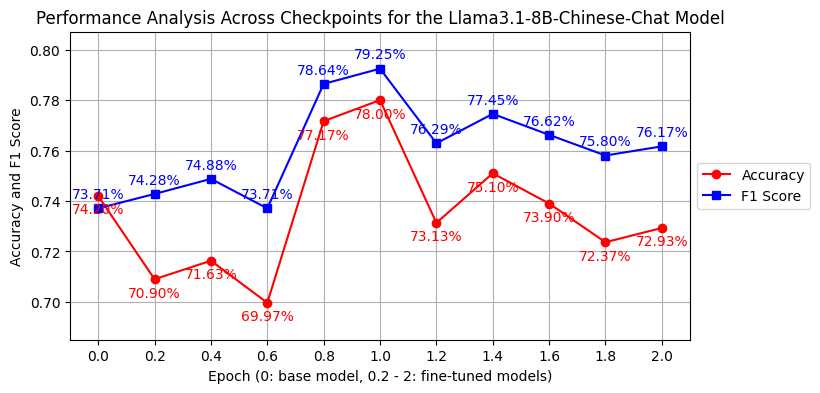

In [46]:
plot_metrics(perf_df, model_name)

In [47]:
perf_df.to_csv(metrics_csv, index=False)

In [48]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Add values on top of points


shots                     model  \
0     0  Llama3.1-8B-Chinese-Chat   
1     5  Llama3.1-8B-Chinese-Chat   
2    10  Llama3.1-8B-Chinese-Chat   
3    20  Llama3.1-8B-Chinese-Chat   
4    30  Llama3.1-8B-Chinese-Chat   

                                              run  accuracy  precision  \
0  shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00  0.742000   0.747706   
1  shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05  0.705667   0.760575   
2  shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10  0.667667   0.783408   
3  shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20  0.767000   0.769059   
4  shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30  0.769333   0.776584   

     recall        f1  ratio_valid_classifications  
0  0.742000  0.737105                     0.803333  
1  0.705667  0.726919                     0.988667  
2  0.667667  0.708261                     0.962333  
3  0.767000  0.766170                     0.979000  
4  0.769333  0.769733                     0.732667

0: shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00
5: shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05
10: shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10
20: shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20
30: shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30


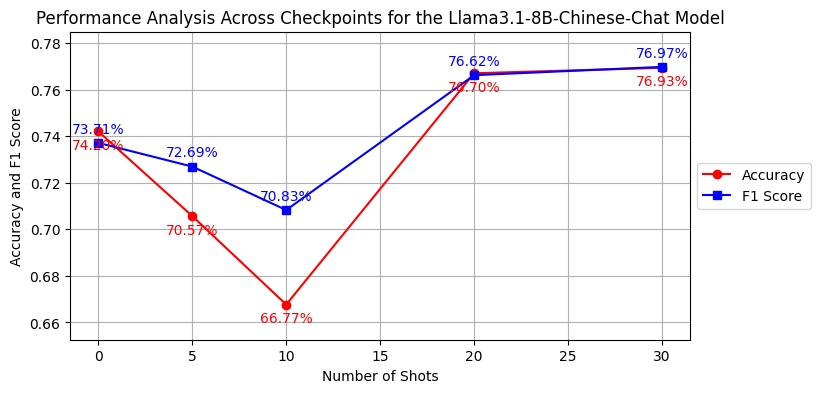

In [49]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [50]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是       1286
是         940
不是。       517
不重要        83
回答正确       67
是。         56
问法错误       34
不是重要       14
是物品。        1
不是重要。       1
是男          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

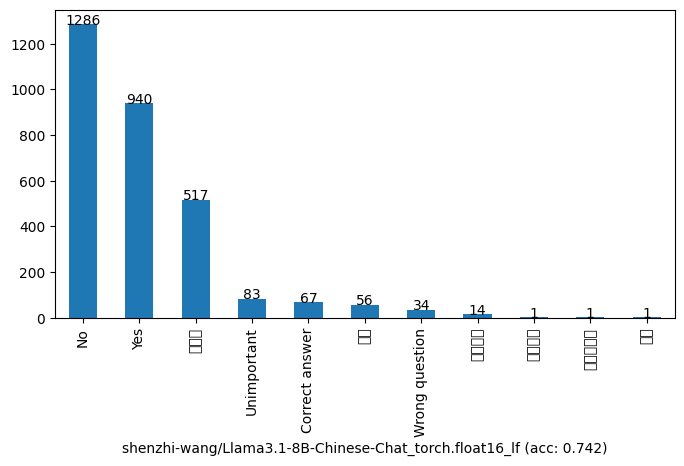

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1245
是       1150
不重要      538
问法错误      38
回答正确      29
Name: count, dtype: int64


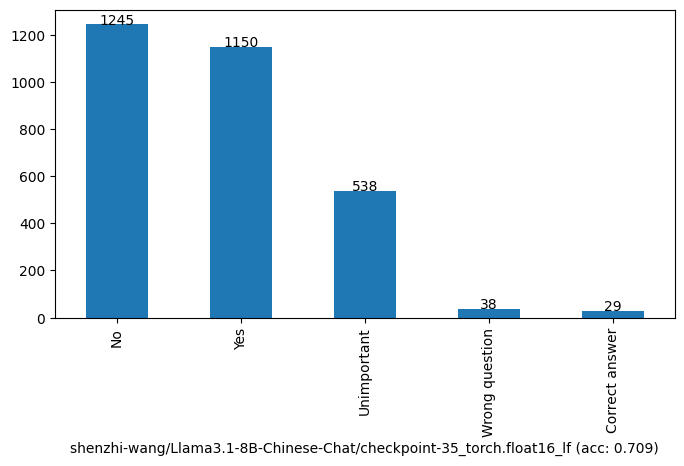

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是              1227
是               1185
不重要              544
回答正确              26
问法错误              16
小男孩                1
破旧帽子是小男孩的爷爷的       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

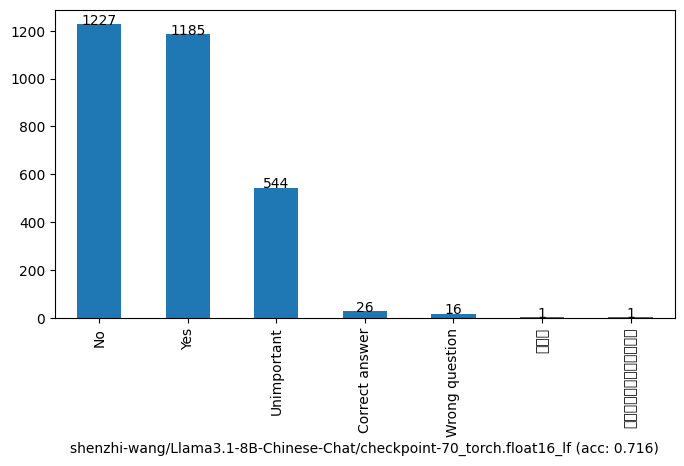

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1206
是       1124
不重要      602
回答正确      36
问法错误      32
Name: count, dtype: int64


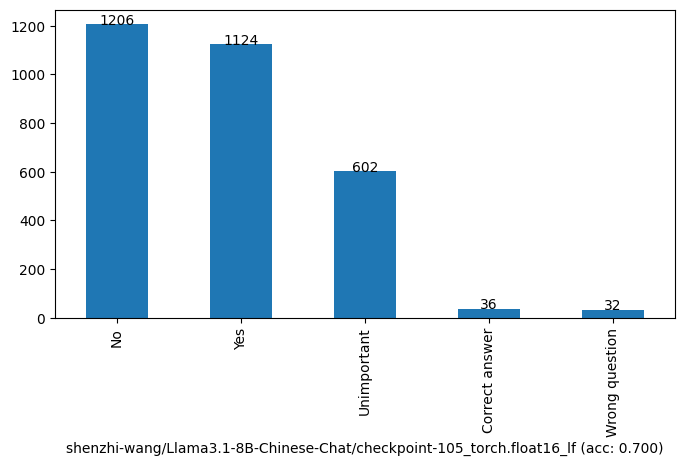

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1458
是       1131
不重要      315
问法错误      59
回答正确      37
Name: count, dtype: int64


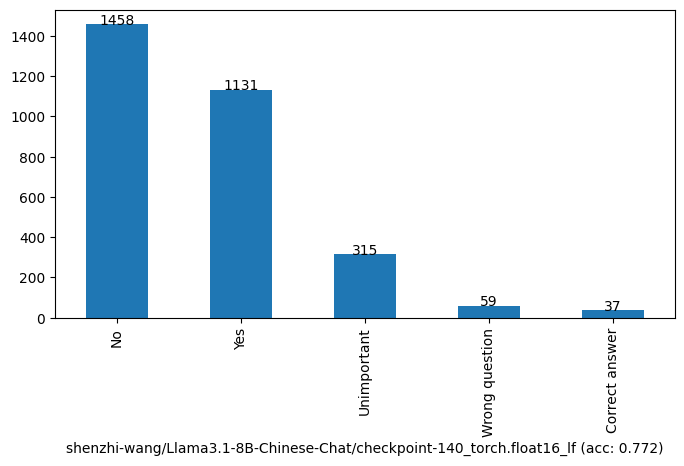

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1483
是       1150
不重要      287
问法错误      49
回答正确      31
Name: count, dtype: int64


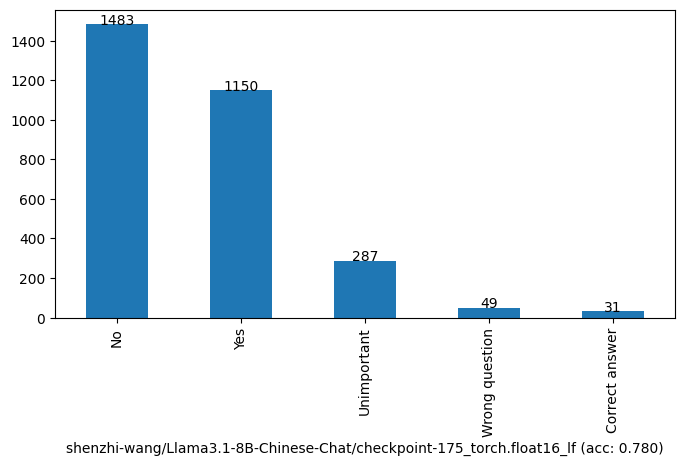

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1260
是       1141
不重要      482
问法错误      83
回答正确      34
Name: count, dtype: int64


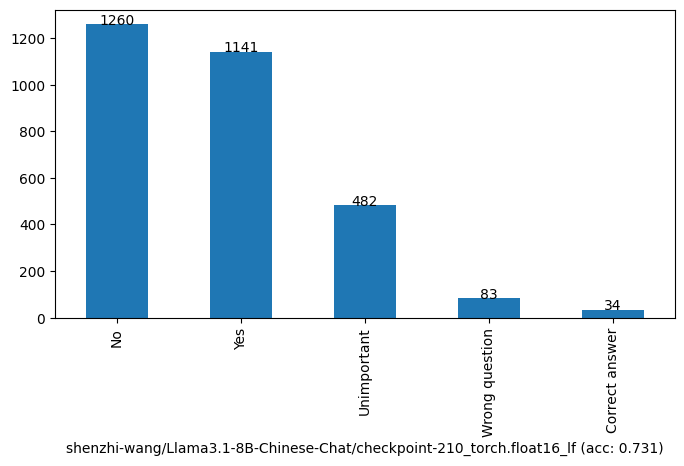

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1348
是       1161
不重要      431
问法错误      31
回答正确      29
Name: count, dtype: int64


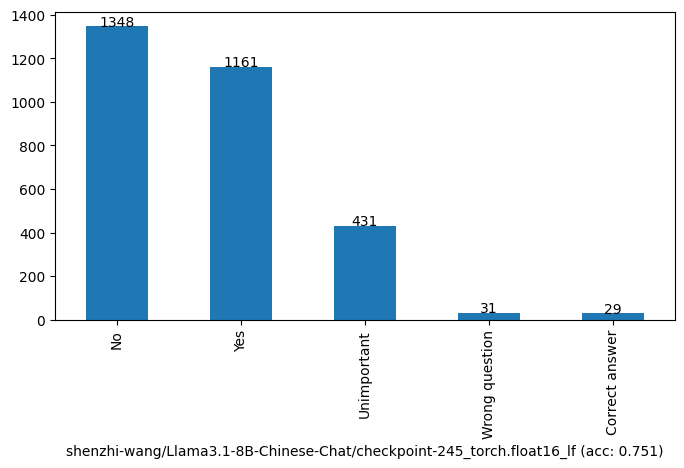

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1359
是       1103
不重要      459
问法错误      47
回答正确      32
Name: count, dtype: int64


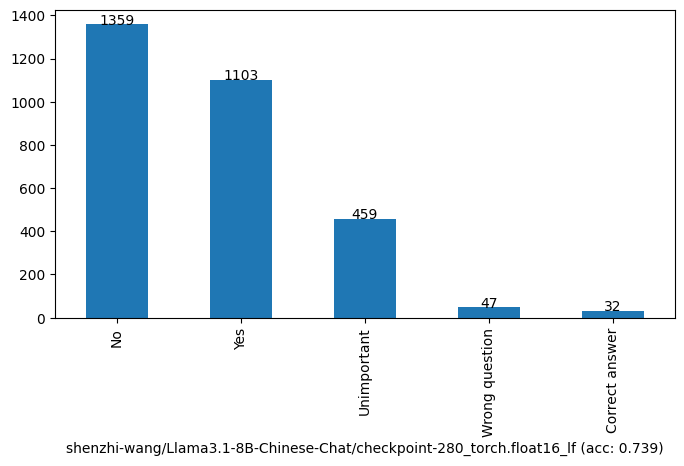

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1302
是       1079
不重要      538
问法错误      46
回答正确      35
Name: count, dtype: int64


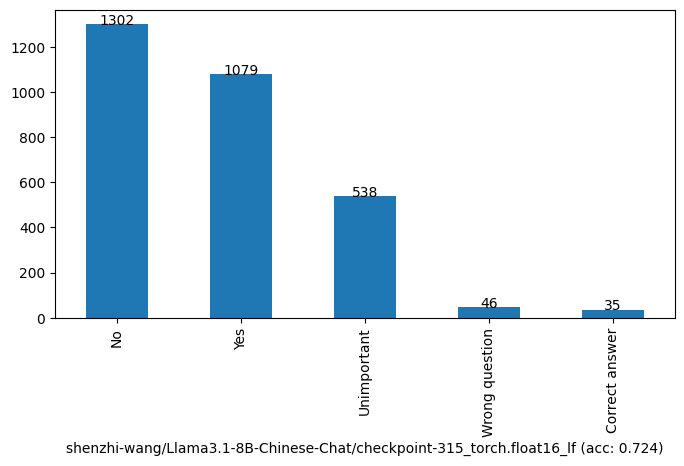

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1309
是       1091
不重要      522
问法错误      43
回答正确      35
Name: count, dtype: int64


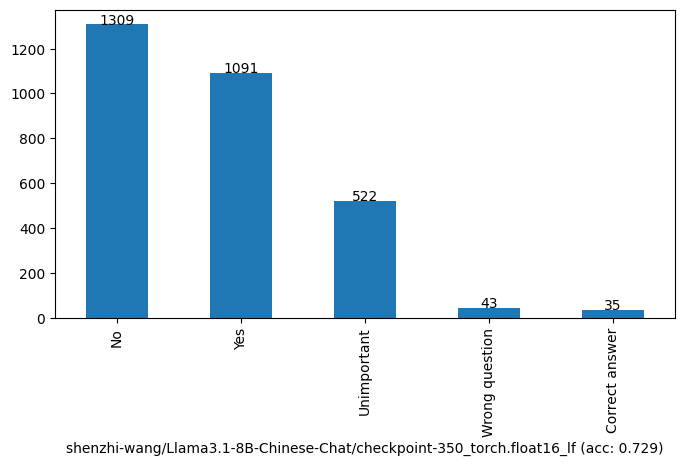

In [51]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是       1286
是         940
不是。       517
不重要        83
回答正确       67
是。         56
问法错误       34
不是重要       14
是物品。        1
不是重要。       1
是男          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

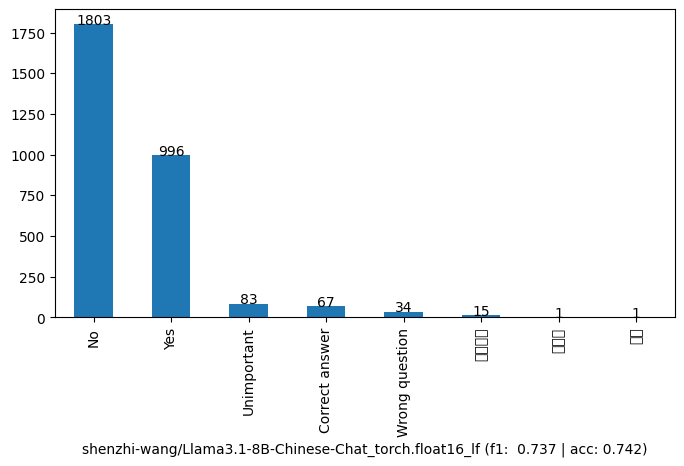

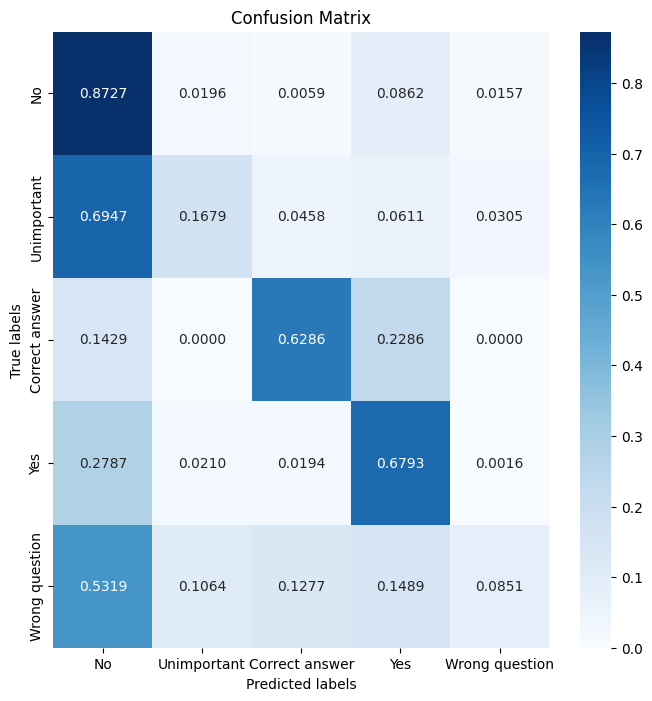

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1245
是       1150
不重要      538
问法错误      38
回答正确      29
Name: count, dtype: int64


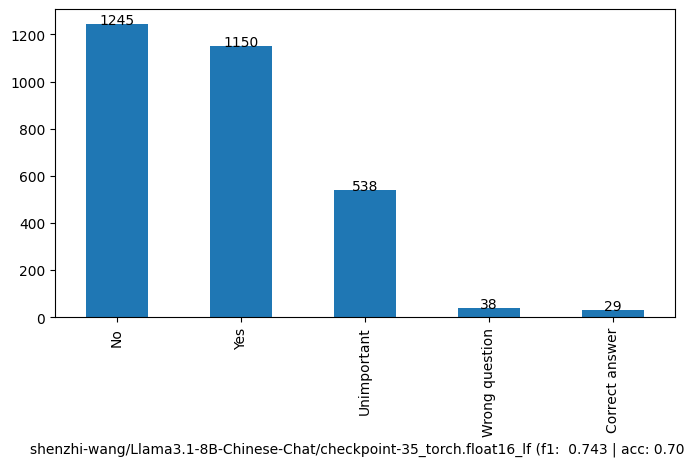

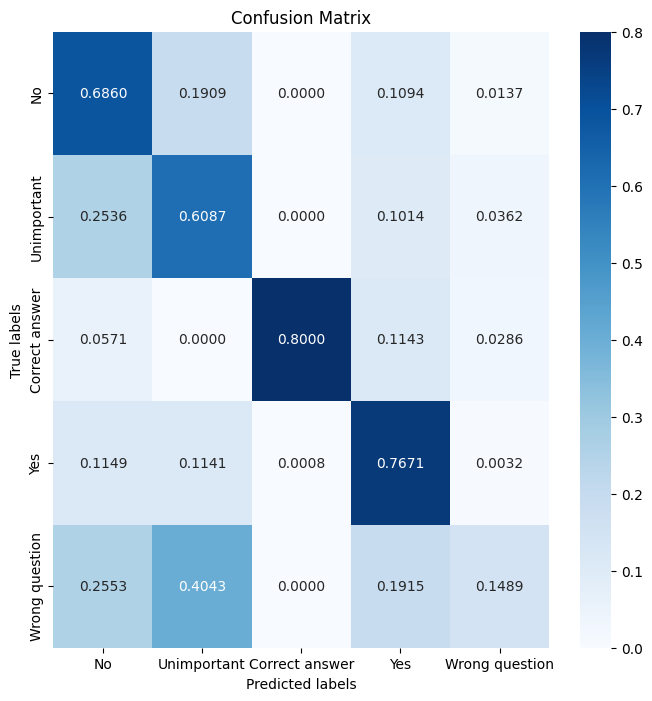

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是              1227
是               1185
不重要              544
回答正确              26
问法错误              16
小男孩                1
破旧帽子是小男孩的爷爷的       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

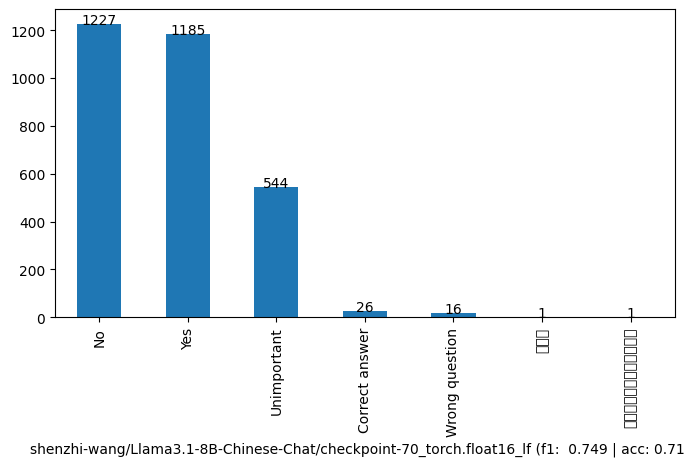

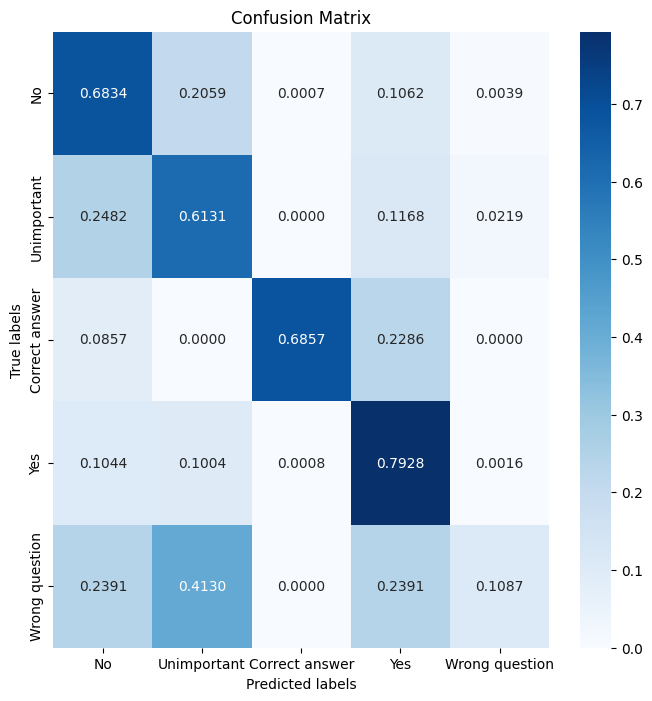

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1206
是       1124
不重要      602
回答正确      36
问法错误      32
Name: count, dtype: int64


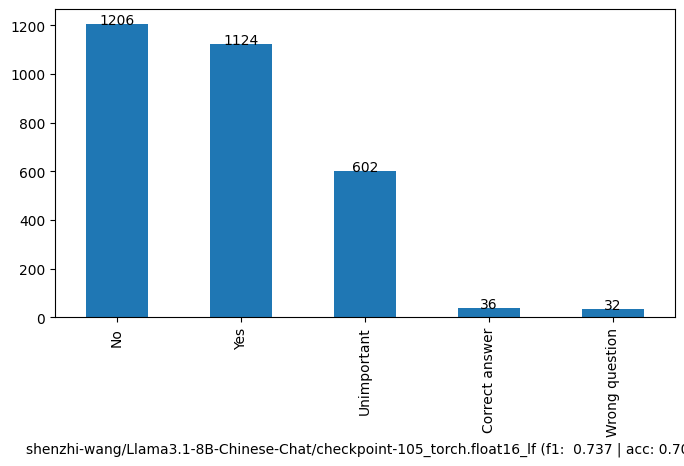

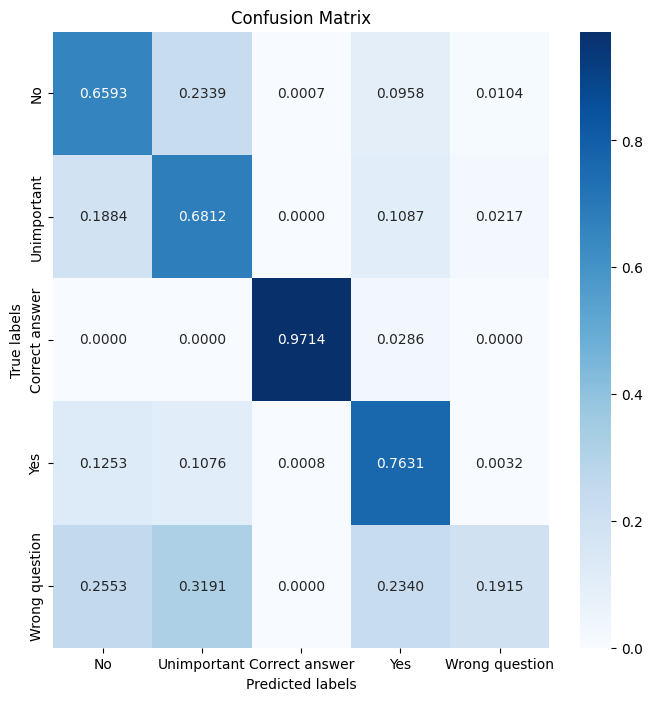

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1458
是       1131
不重要      315
问法错误      59
回答正确      37
Name: count, dtype: int64


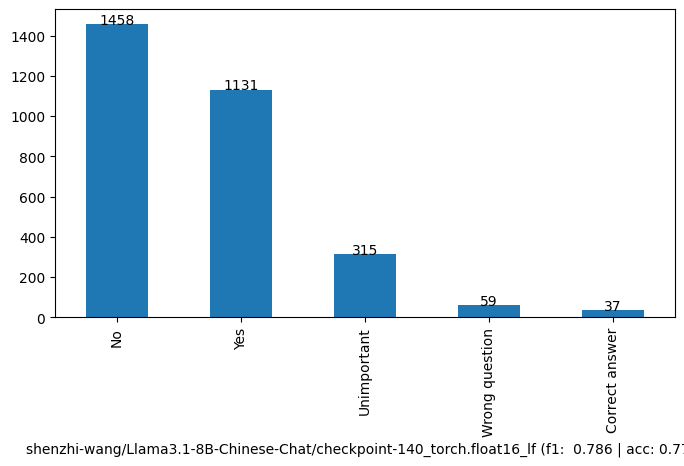

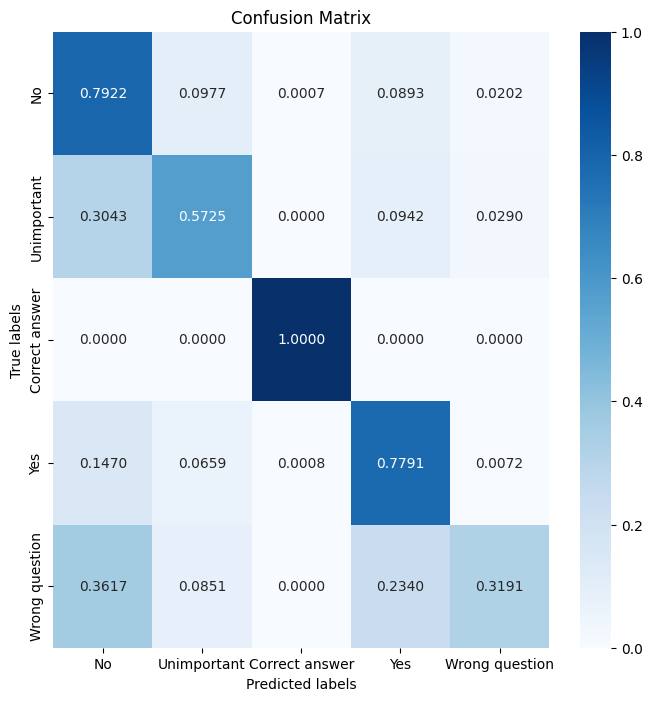

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1483
是       1150
不重要      287
问法错误      49
回答正确      31
Name: count, dtype: int64


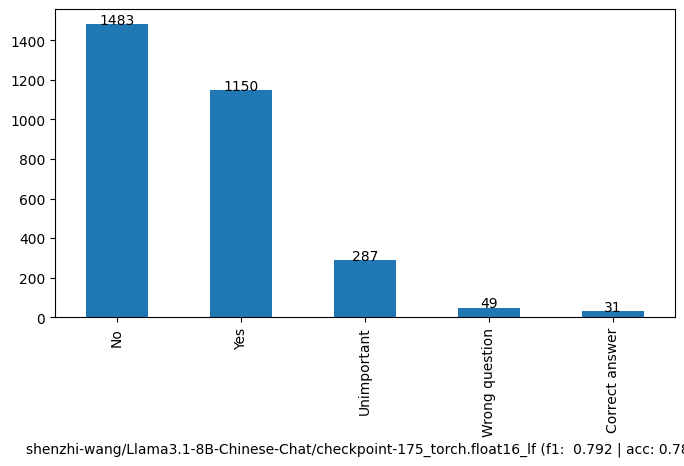

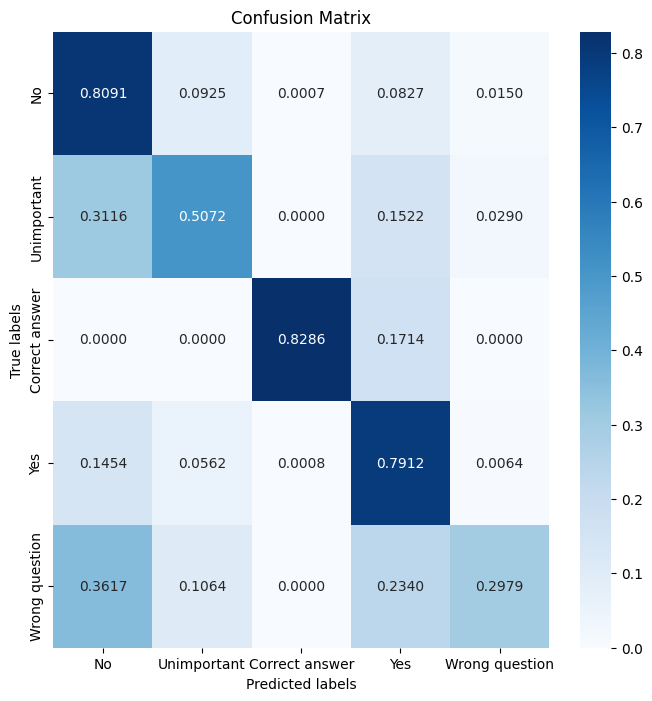

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1260
是       1141
不重要      482
问法错误      83
回答正确      34
Name: count, dtype: int64


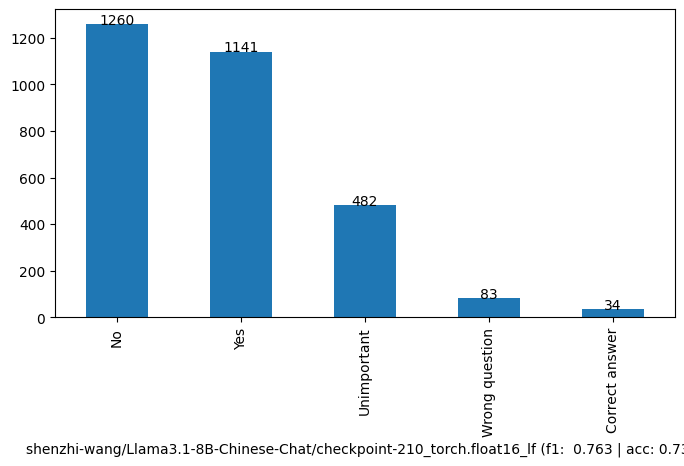

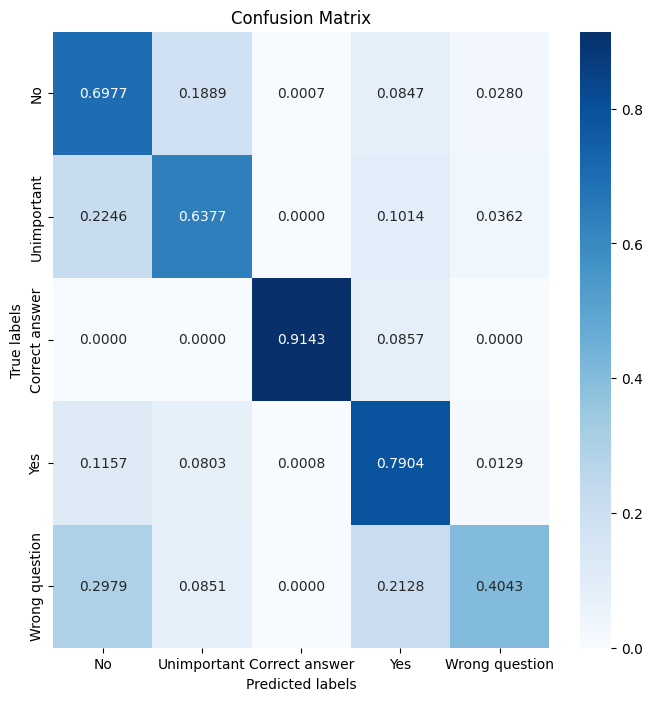

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1348
是       1161
不重要      431
问法错误      31
回答正确      29
Name: count, dtype: int64


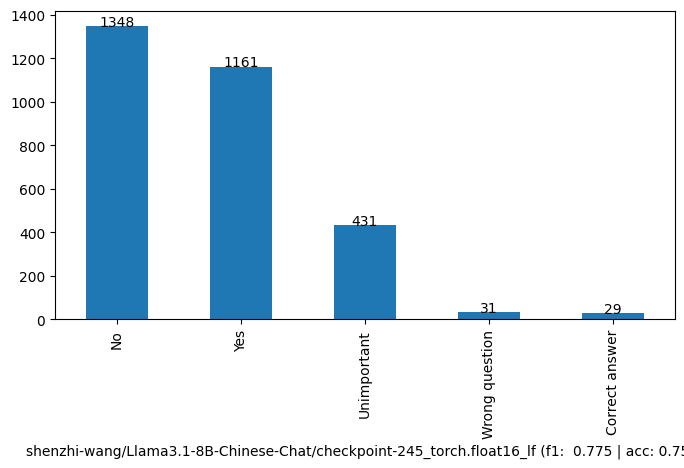

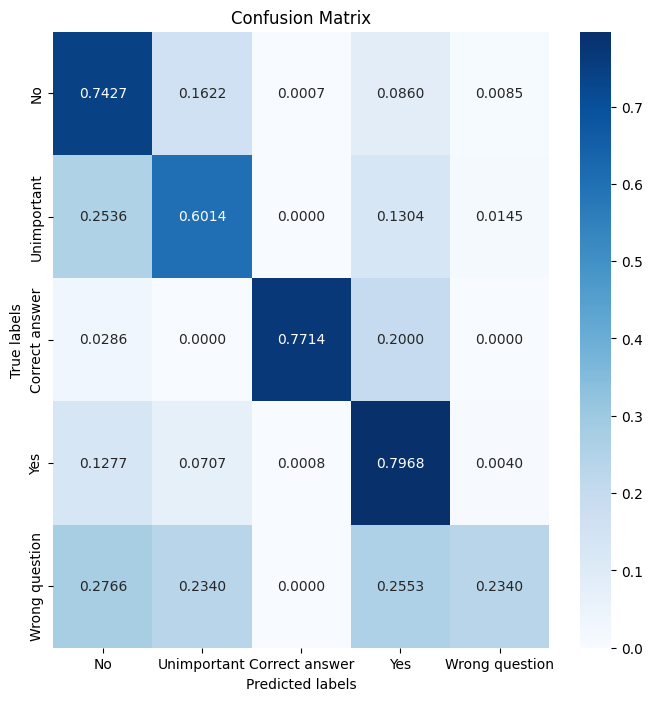

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1359
是       1103
不重要      459
问法错误      47
回答正确      32
Name: count, dtype: int64


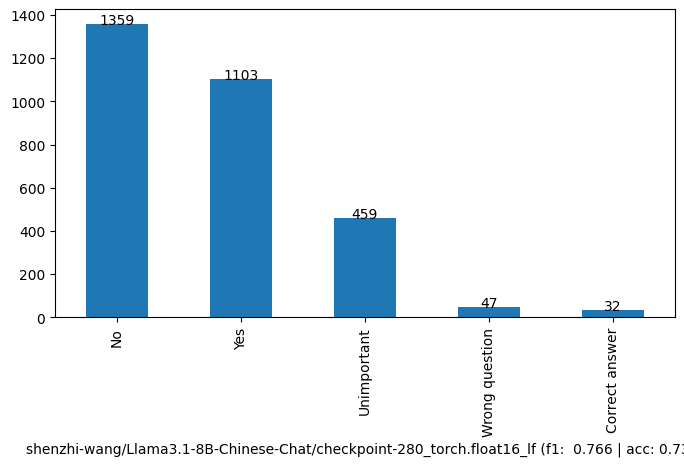

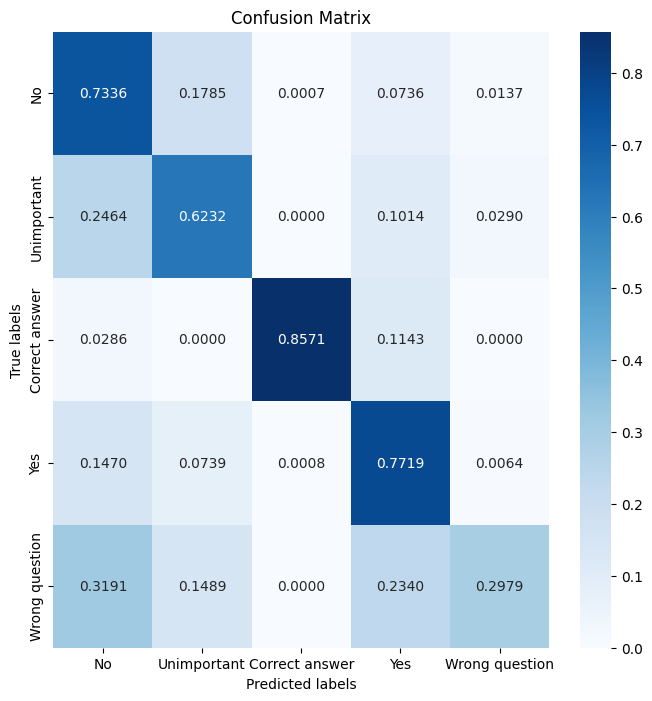

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1302
是       1079
不重要      538
问法错误      46
回答正确      35
Name: count, dtype: int64


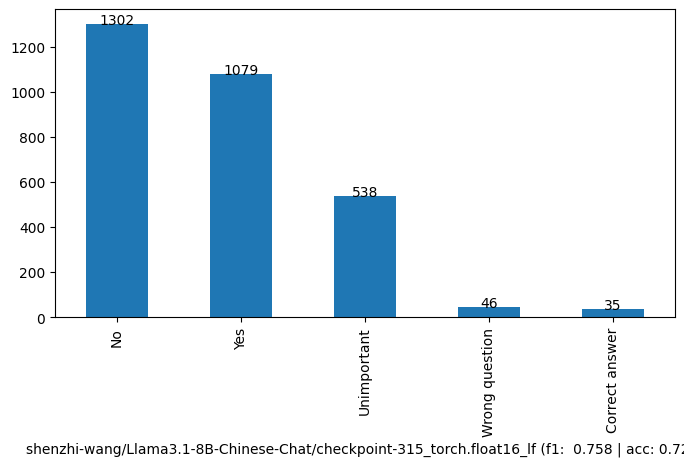

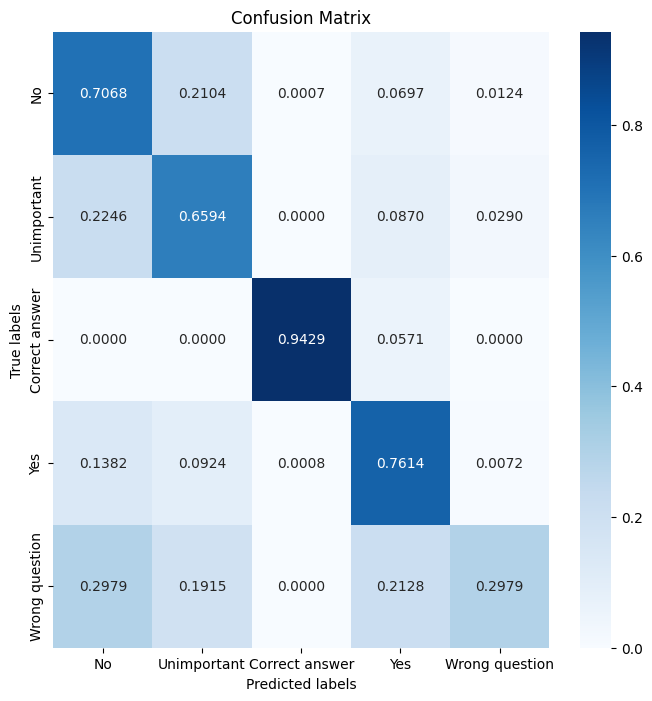

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1309
是       1091
不重要      522
问法错误      43
回答正确      35
Name: count, dtype: int64


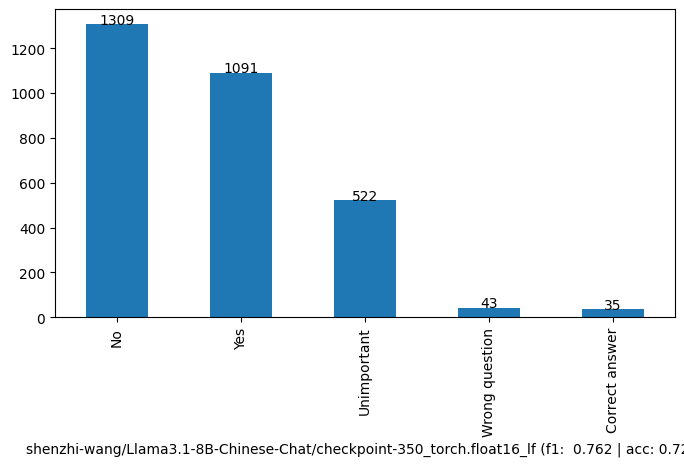

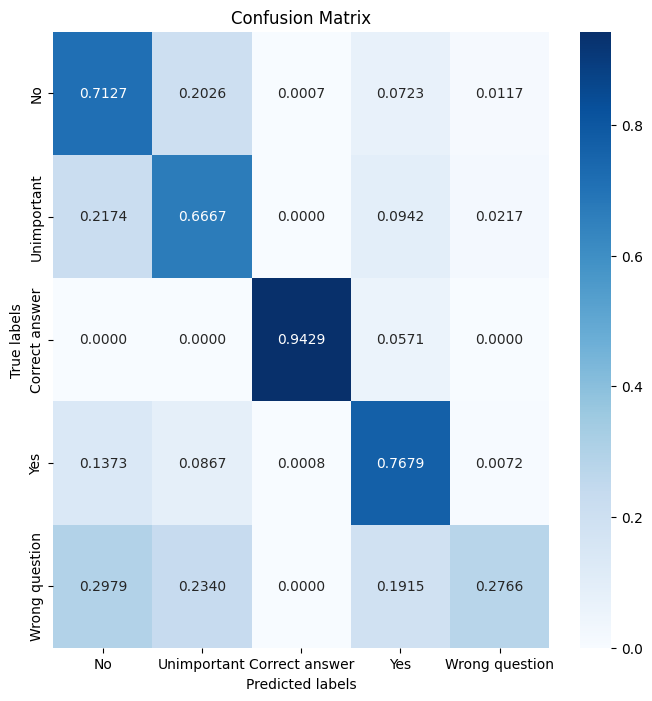

In [52]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00
不是       1286
是         940
不是。       517
不重要        83
回答正确       67
是。         56
问法错误       34
不是重要       14
是物品。        1
不是重要。       1
是男          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

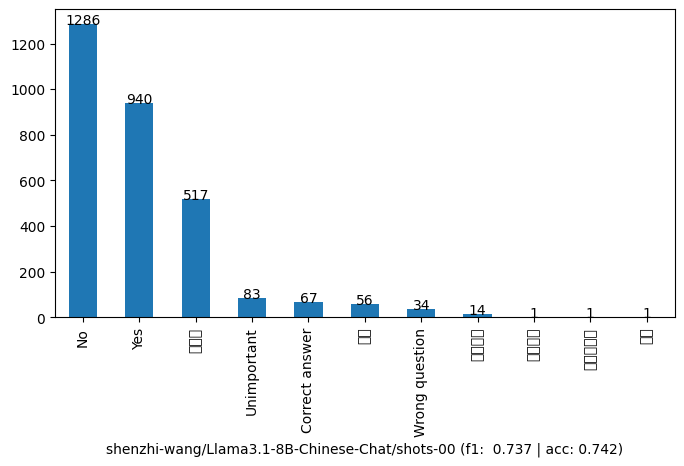

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10
是                                                                                           1136
不是                                                                                          1054
不重要                                                                                          582
回答正确                                                                                         106
不是。                                                                                           96
问法错误                                                                                           9
重要                                                                                             3
帽子是小男孩放的。                                                                                      2
根据游戏规则，您可以提出一个封闭式问题来寻找事件的真相。请记住，主持人会根据实际情况回答“是”、“不是”、“不重要”、“回答正确”或“问法错误”。请尽量提出一个具体的问题。         1
根据游戏规则，您可以提

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

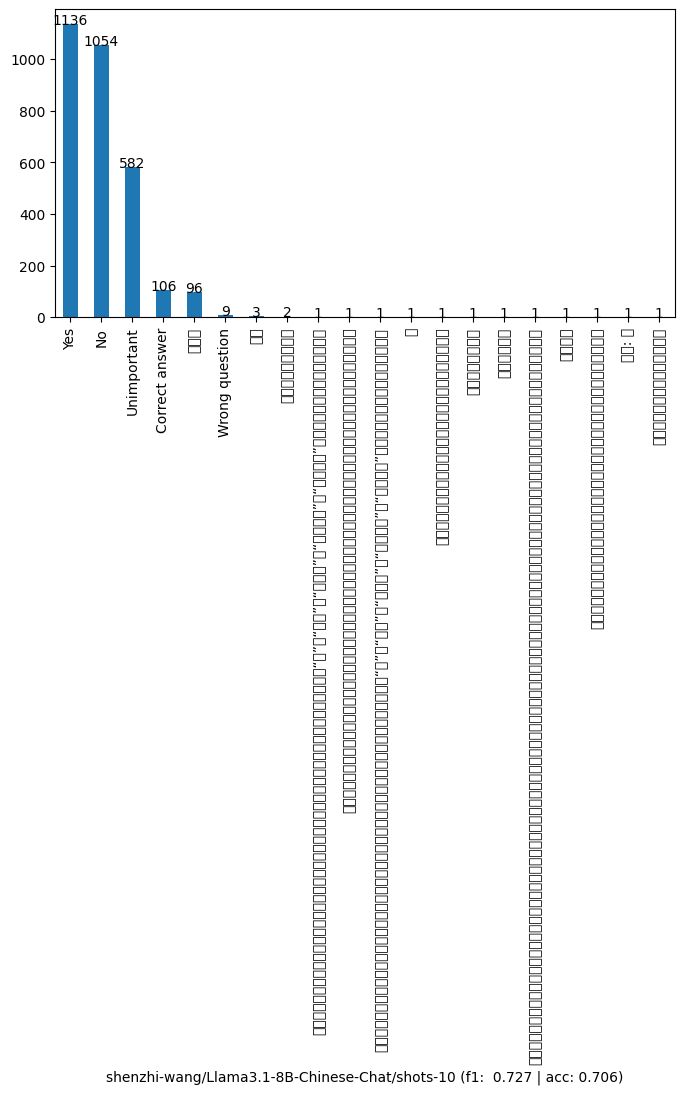

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05
不是                                                                  1408
是                                                                   1091
不重要                                                                  380
回答正确                                                                  73
不是。                                                                   23
问法错误                                                                  14
帽子是小男孩的。                                                               2
重要                                                                     1
物品                                                                     1
是为爷爷而哭                                                                 1
是小男孩的哭声。                                                               1
在这个谜面中，湖边有一个小男孩和他的爷爷住着。他们是湖边的居民，和这个故事紧密相关。                             1
根据游戏规则，参

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

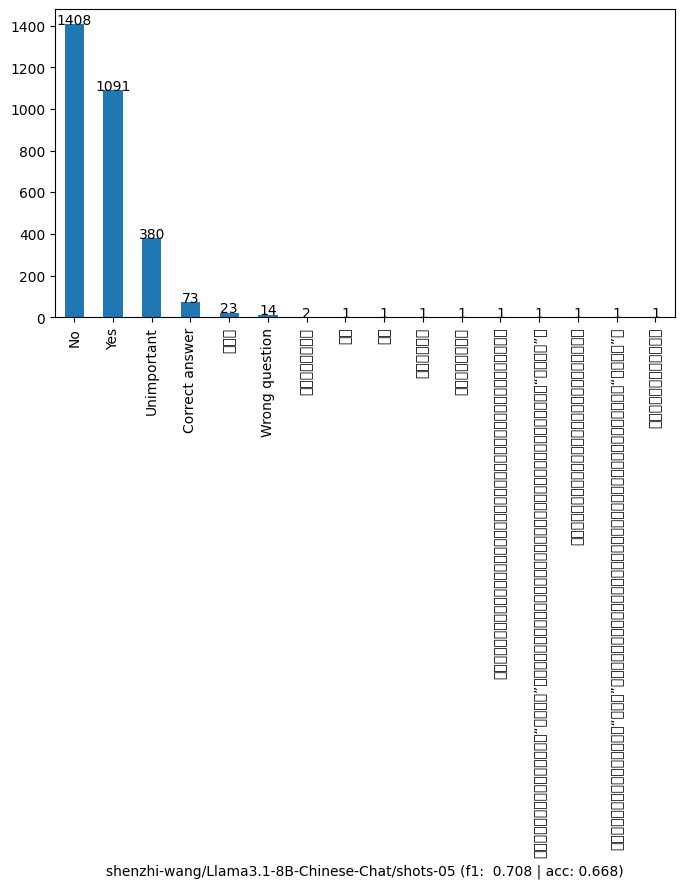

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20
不是                                                                                                                                                                                                                  1467
是                                                                                                                                                                                                                   1254
不重要                                                                                                                                                                                                                  156
回答正确                                                                                                                                                                                                                  53
不是。             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

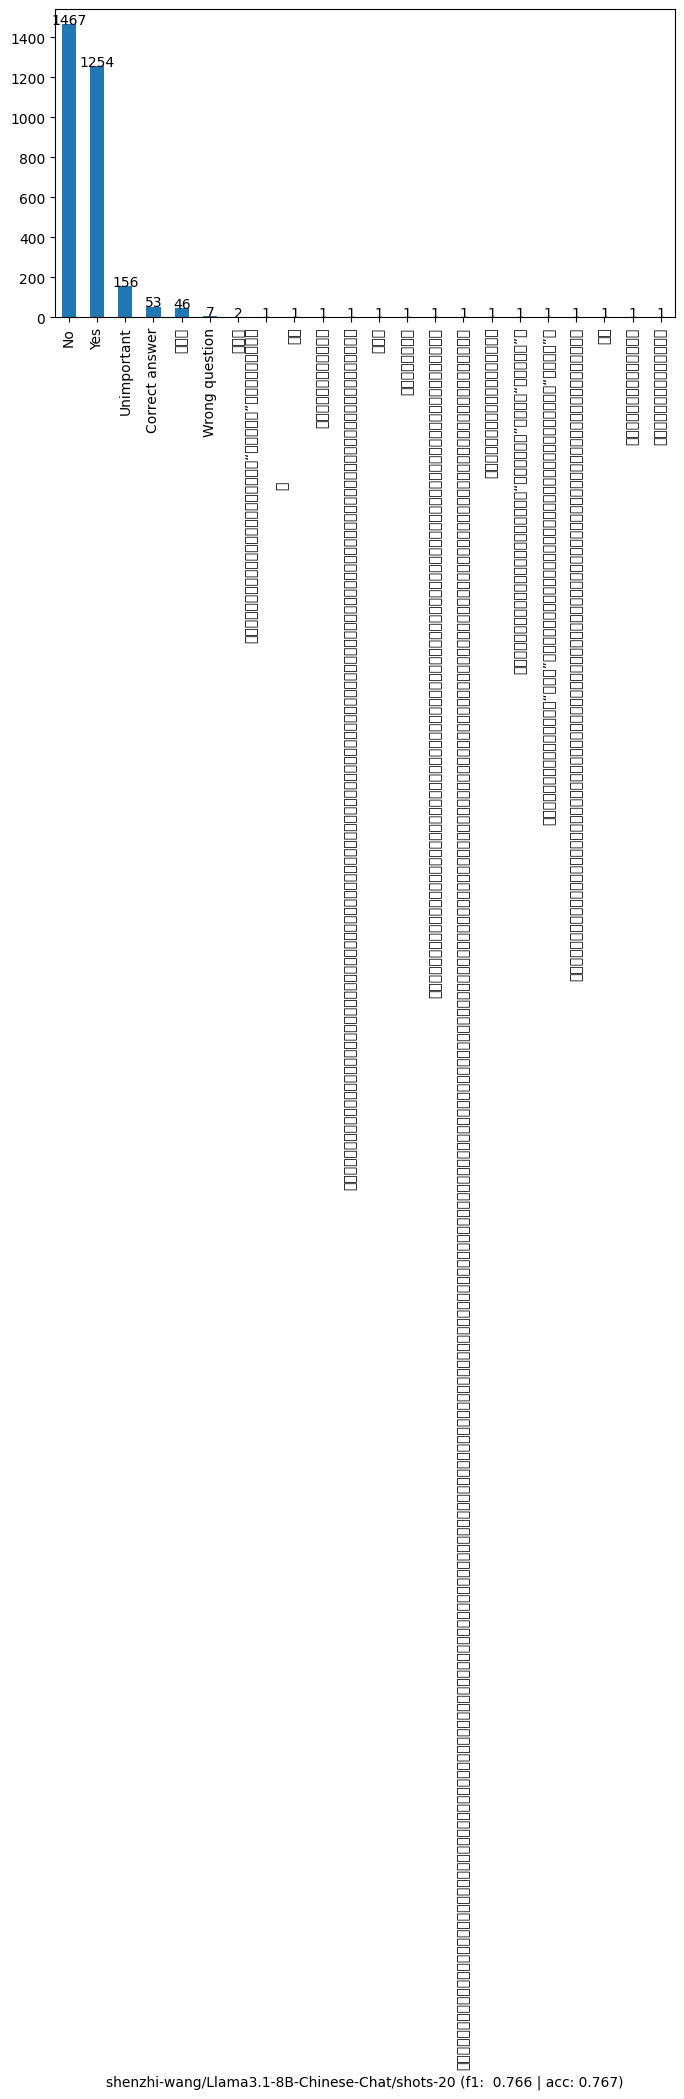

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30
是                                                                                    1262
不是。                                                                                   760
不是                                                                                    757
不重要                                                                                   148
回答正确                                                                                   27
是的，我可以根据提供的谜面和谜底来回答参与者的问题。请提供下一个问题。                                                     8
是。                                                                                      7
问法错误                                                                                    4
破旧的                                                                                     2
是男孩。                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/env

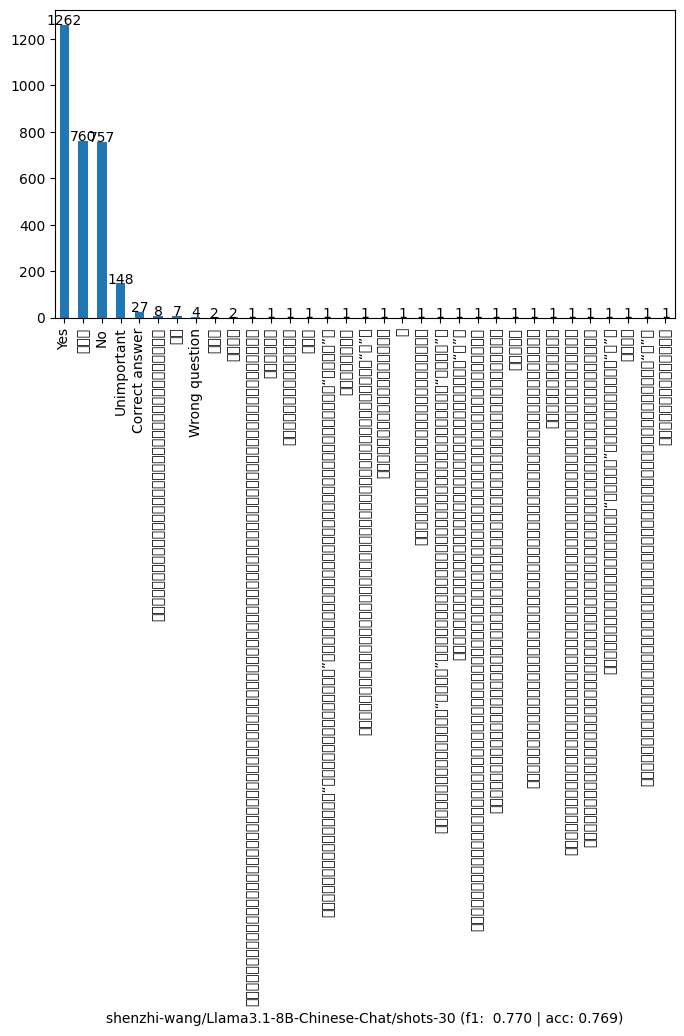

In [53]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00
不是       1286
是         940
不是。       517
不重要        83
回答正确       67
是。         56
问法错误       34
不是重要       14
是物品。        1
不是重要。       1
是男          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

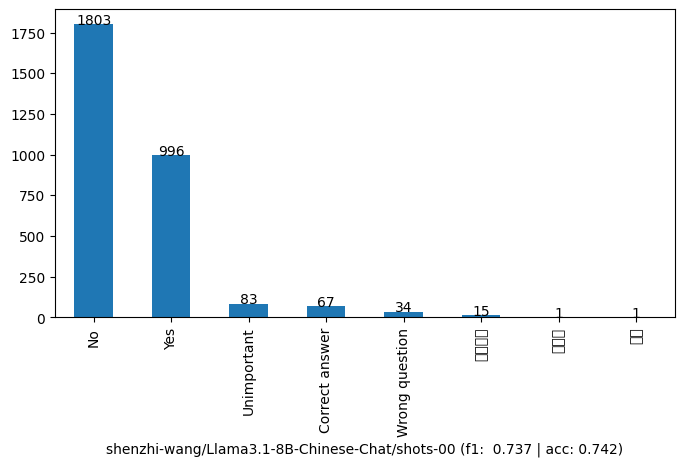

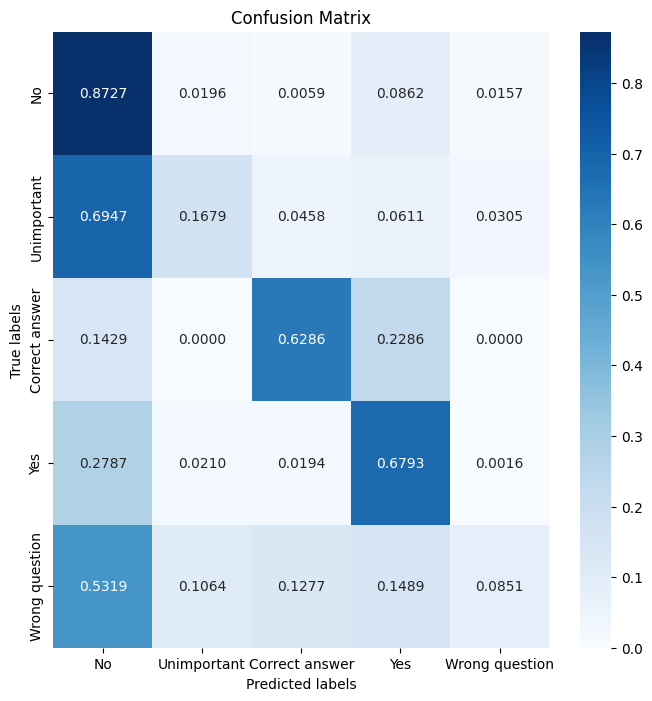

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10
是                                                                                           1136
不是                                                                                          1054
不重要                                                                                          582
回答正确                                                                                         106
不是。                                                                                           96
问法错误                                                                                           9
重要                                                                                             3
帽子是小男孩放的。                                                                                      2
根据游戏规则，您可以提出一个封闭式问题来寻找事件的真相。请记住，主持人会根据实际情况回答“是”、“不是”、“不重要”、“回答正确”或“问法错误”。请尽量提出一个具体的问题。         1
根据游戏规则，您可以提

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

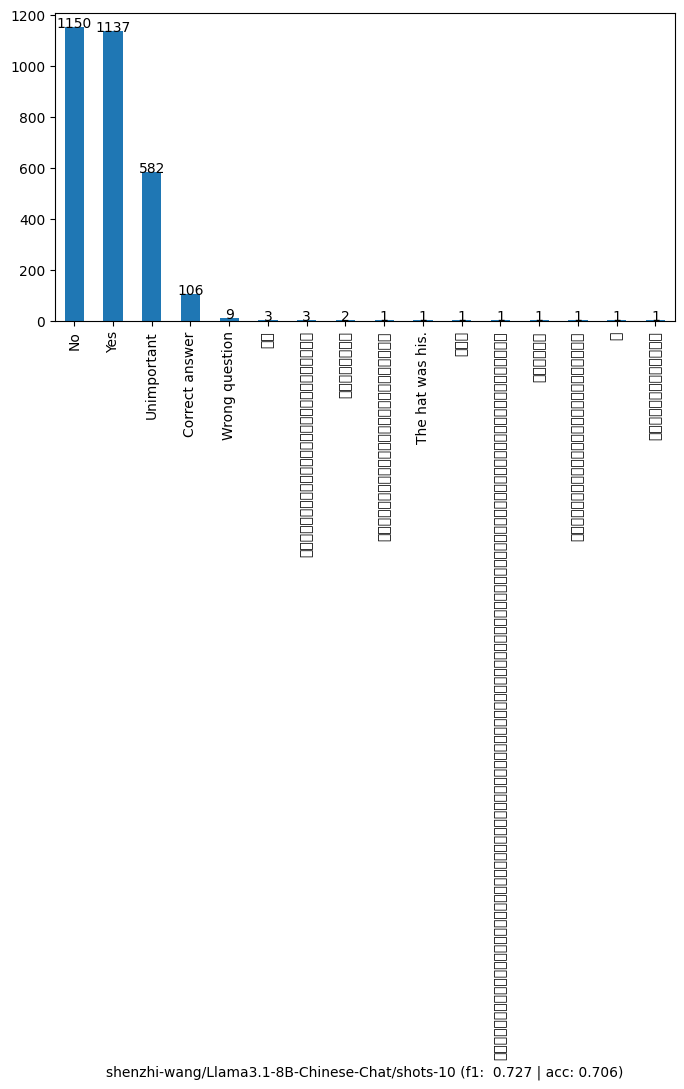

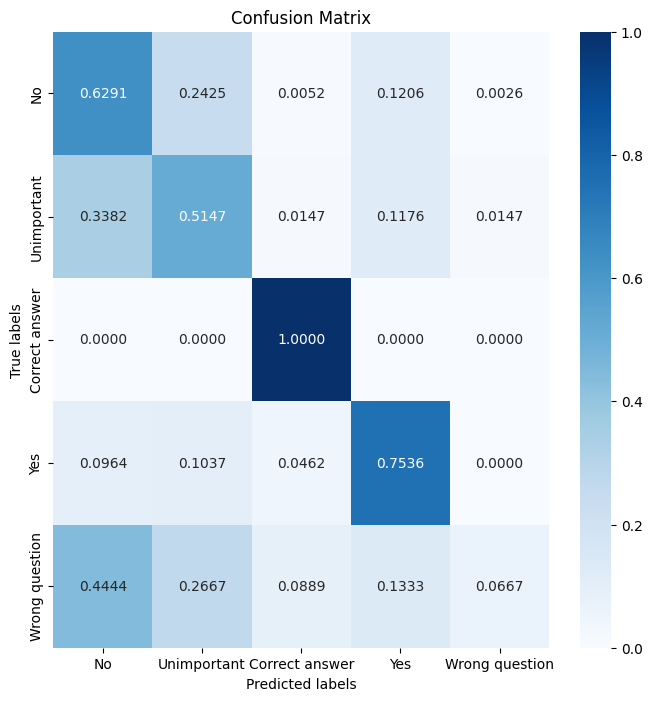

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05
不是                                                                  1408
是                                                                   1091
不重要                                                                  380
回答正确                                                                  73
不是。                                                                   23
问法错误                                                                  14
帽子是小男孩的。                                                               2
重要                                                                     1
物品                                                                     1
是为爷爷而哭                                                                 1
是小男孩的哭声。                                                               1
在这个谜面中，湖边有一个小男孩和他的爷爷住着。他们是湖边的居民，和这个故事紧密相关。                             1
根据游戏规则，参

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

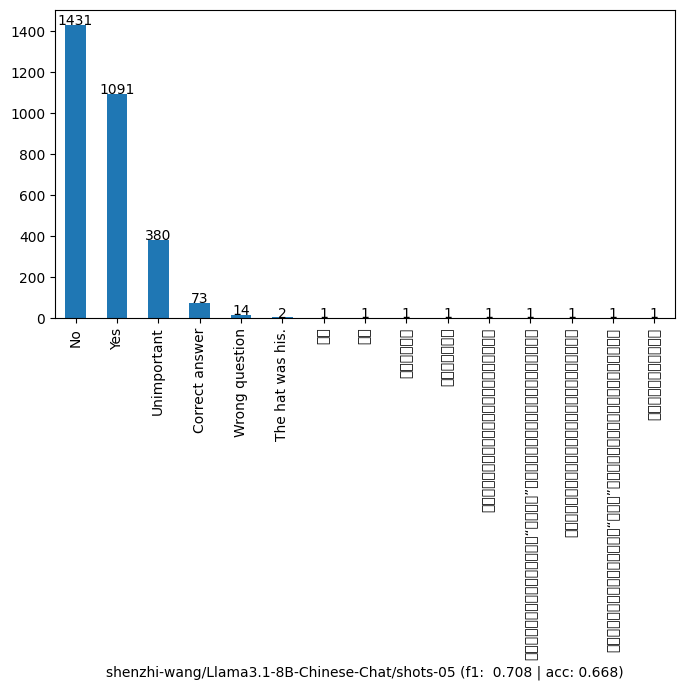

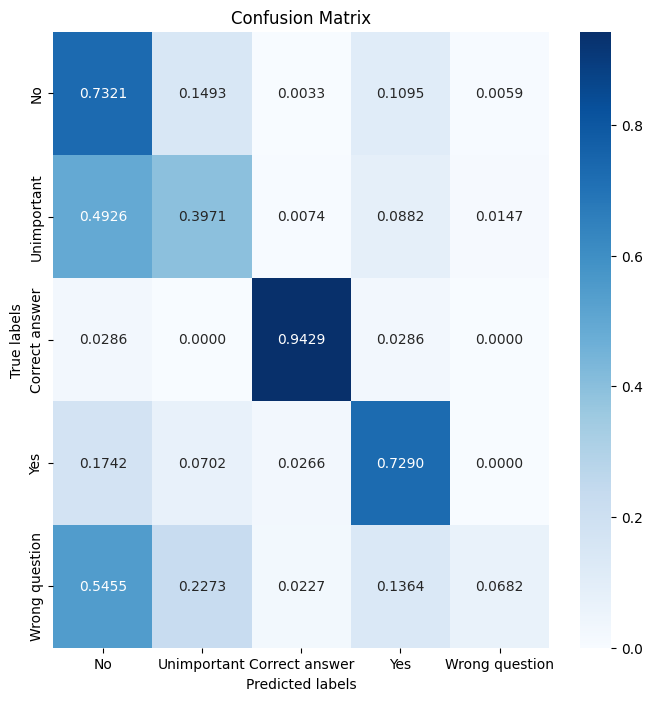

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20
不是                                                                                                                                                                                                                  1467
是                                                                                                                                                                                                                   1254
不重要                                                                                                                                                                                                                  156
回答正确                                                                                                                                                                                                                  53
不是。             

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

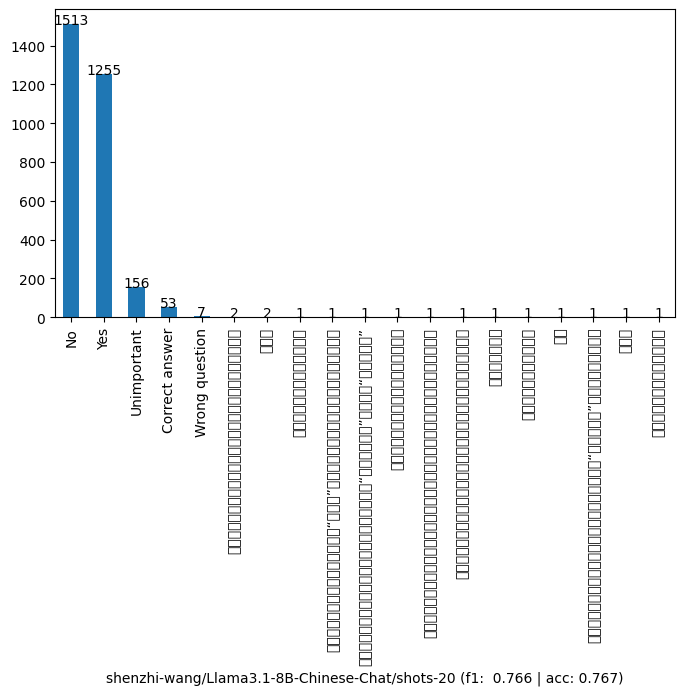

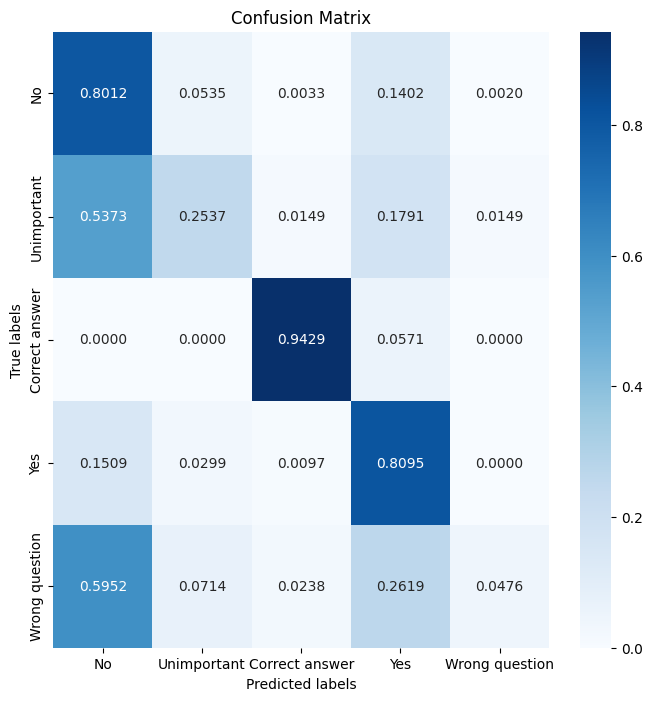

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30 **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30
是                                                                                    1262
不是。                                                                                   760
不是                                                                                    757
不重要                                                                                   148
回答正确                                                                                   27
是的，我可以根据提供的谜面和谜底来回答参与者的问题。请提供下一个问题。                                                     8
是。                                                                                      7
问法错误                                                                                    4
破旧的                                                                                     2
是男孩。                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

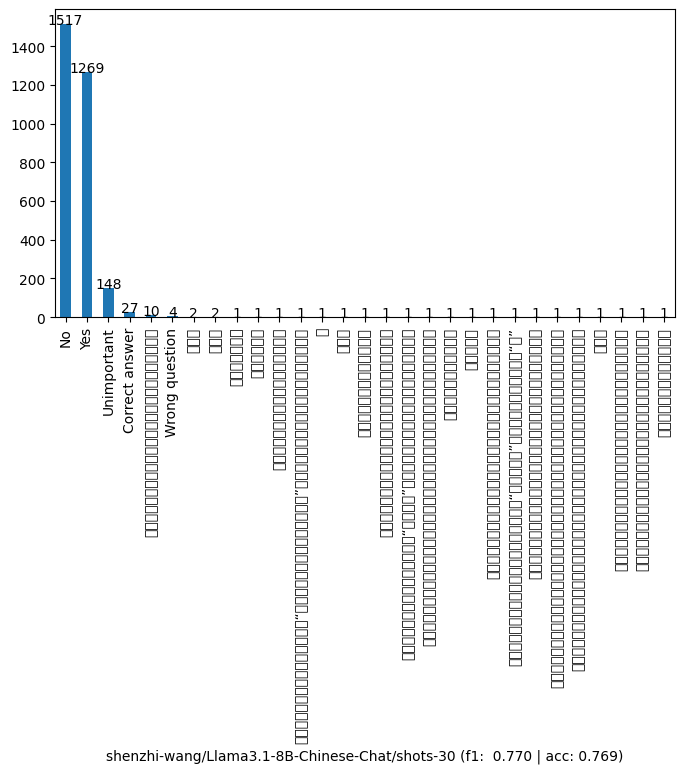

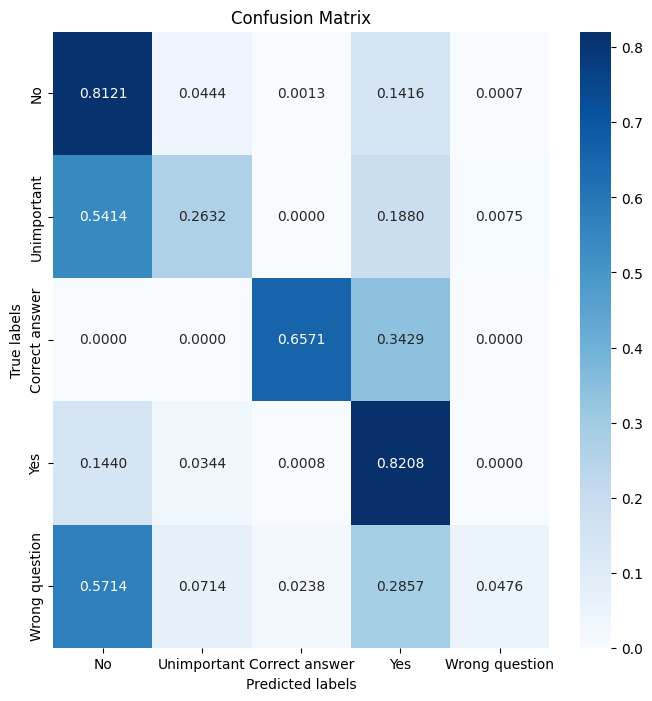

In [54]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )